In [47]:
import pandas as pd
import os
import numpy as np

In [10]:
cna_df = pd.read_csv('data/inputs/all_cancers_cna_df.csv')
tsv_df = pd.read_csv('data/inputs/all_cancers_tsv_df.csv')
vcf_df = pd.read_csv('data/inputs/all_cancers_vcf_df.csv')

In [11]:
# Copy number alterations (CNAs)
# genomic changes involving the deletion or amplification of DNA segments, 
# which play a key role in cancer development and can impact gene expression. 
# chrom: the chromosome number that the alteration occurred
# start: specific base pair position at the beginning of the altered DNA segment
# end: specific base pair position at the end of the altered DNA segment
# major_cn: larger of the two allele copy numbers at that locus
# minor_cn: The smaller of the two allele copy numbers at that locus
cna_df

,chrom,start,end,major_cn,minor_cn,donor_id,study,id,cancer_type
0,1,1,249250621,1,1,sim87,Lymph-CLL,cna0,Lymph-CLL
1,2,1,243199373,1,1,sim87,Lymph-CLL,cna1,Lymph-CLL
2,3,1,198022430,1,1,sim87,Lymph-CLL,cna2,Lymph-CLL
3,4,1,191154276,1,1,sim87,Lymph-CLL,cna3,Lymph-CLL
4,5,1,180915260,1,1,sim87,Lymph-CLL,cna4,Lymph-CLL
...,...,...,...,...,...,...,...,...,...
67714,X,146636776,149293459,2,2,sim51,Breast-AdenoCa,cna404,Breast-AdenoCa
67715,X,149293460,152607683,2,0,sim51,Breast-AdenoCa,cna405,Breast-AdenoCa
67716,X,152607684,155144332,2,1,sim51,Breast-AdenoCa,cna406,Breast-AdenoCa
67717,X,155144333,155151791,4,1,sim51,Breast-AdenoCa,cna407,Breast-AdenoCa


In [22]:
cna_df['chrom'].value_counts()

1     5090
2     4414
X     3894
3     3812
5     3623
4     3526
7     3378
6     3237
12    3074
8     3038
11    3002
10    2941
9     2834
13    2766
14    2469
15    2442
18    2154
16    2137
17    2091
20    1865
19    1726
22    1521
21    1474
Y     1211
Name: chrom, dtype: int64

In [12]:
# structural variants (tsv)
# 2 locations of variants
# strands: + the breakpoint is on the forward (plus) strand of the reference
#          - the breakpoint is on the reverse (minus) strand of the reference
# svclass: DEL (deletion) DUP (duplication)
# allele: 
#   major allele = the haplotype (parental copy) with the higher copy number
#   minor allele = the haplotype with the lower copy number
tsv_df

,chrom1,start1,end1,chrom2,start2,end2,strand1,strand2,svclass,id,allele,donor_id,tumor,cancer_type
0,2,239593892,239593893,2,243199373,243199374,+,-,DEL,cna2,minor,sim11,Lymph-CLL,Lymph-CLL
1,5,9097605,9097606,5,12331150,12331151,-,+,DUP,cna6,major,sim11,Lymph-CLL,Lymph-CLL
2,5,12331151,12331152,5,180915260,180915261,+,-,DEL,cna7,minor,sim11,Lymph-CLL,Lymph-CLL
3,6,141477017,141477018,6,171115067,171115068,+,-,DEL,cna9,minor,sim11,Lymph-CLL,Lymph-CLL
4,9,140763827,140763828,9,141213431,141213432,-,+,DUP,cna13,major,sim11,Lymph-CLL,Lymph-CLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90886,22,51174528,51174529,22,51304566,51304567,-,+,DUP,cna234,major,sim76,Breast-AdenoCa,Breast-AdenoCa
90887,X,3752614,3752615,X,18814659,18814660,+,+,h2hINV,cna235,major,sim76,Breast-AdenoCa,Breast-AdenoCa
90888,X,42956969,42956970,X,50230425,50230426,-,+,DUP,cna236,major,sim76,Breast-AdenoCa,Breast-AdenoCa
90889,X,122122165,122122166,X,155270560,155270561,-,+,DUP,cna238,minor,sim76,Breast-AdenoCa,Breast-AdenoCa


In [25]:
print(tsv_df['chrom1'].value_counts())
print(tsv_df['chrom2'].value_counts())

1     8117
2     6883
3     5947
5     5317
4     5150
6     4896
7     4854
X     4635
8     4502
12    4226
11    4205
10    3853
9     3645
13    3317
14    2830
15    2698
17    2640
18    2535
16    2465
20    2110
19    1996
22    1516
21    1437
Y     1117
Name: chrom1, dtype: int64
1     6951
2     5931
3     5287
X     5222
5     4986
4     4753
7     4707
6     4627
12    4403
8     4383
11    4343
10    3962
9     3687
13    3556
14    3154
15    3035
17    2966
18    2846
16    2749
20    2424
19    2327
22    1753
21    1637
Y     1202
Name: chrom2, dtype: int64


In [31]:
tsv_df['svclass'].value_counts()

DUP       47438
DEL       22225
TRA        7517
t2tINV     7067
h2hINV     6644
Name: svclass, dtype: int64

In [20]:
# variant call format (VCF)
# Ref: what the base is supposed to be 
# Alt: what the mutation is
# QUAL and FILTER: just '.'
# Info: AF = Allele Frequency
#       MS = Mutational Signature

# AF=0.27;MS=SBS5
# AF: 27% of alleles at this locus (POS) have the ALT
# MS: SBS: single base substitution
# 
vcf_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,cancer_type,AF,MS
0,1,3768230,sim3,G,T,.,.,AF=0.27;MS=SBS5,Lymph-CLL,AF=0.27,MS=SBS5
1,1,3770069,sim3,T,G,.,.,AF=0.59;MS=SBS5,Lymph-CLL,AF=0.59,MS=SBS5
2,1,5143136,sim3,A,G,.,.,AF=0.21;MS=SBS5,Lymph-CLL,AF=0.21,MS=SBS5
3,1,7284496,sim3,T,C,.,.,AF=0.19;MS=SBS5,Lymph-CLL,AF=0.19,MS=SBS5
4,1,17592191,sim3,G,A,.,.,AF=0.13;MS=SBS5,Lymph-CLL,AF=0.13,MS=SBS5
...,...,...,...,...,...,...,...,...,...,...,...
6719326,X,151793044,sim4,G,A,.,.,AF=0.27;MS=SBS5,Breast-AdenoCa,AF=0.27,MS=SBS5
6719327,X,152214102,sim4,G,T,.,.,AF=0.44;MS=SBS5,Breast-AdenoCa,AF=0.44,MS=SBS5
6719328,X,152930953,sim4,CTTTTTCTATT,C,.,.,AF=0.18;MS=DEL,Breast-AdenoCa,AF=0.18,MS=DEL
6719329,X,154930673,sim4,T,A,.,.,AF=0.26;MS=SBS5,Breast-AdenoCa,AF=0.26,MS=SBS5


In [18]:
vcf_df[['AF', 'MS']] = vcf_df['INFO'].str.split(';', expand=True)
vcf_df = vcf_df.drop("INFO", axis = 1)

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,cancer_type,AF,MS
0,1,3768230,sim3,G,T,.,.,Lymph-CLL,AF=0.27,MS=SBS5
1,1,3770069,sim3,T,G,.,.,Lymph-CLL,AF=0.59,MS=SBS5
2,1,5143136,sim3,A,G,.,.,Lymph-CLL,AF=0.21,MS=SBS5
3,1,7284496,sim3,T,C,.,.,Lymph-CLL,AF=0.19,MS=SBS5
4,1,17592191,sim3,G,A,.,.,Lymph-CLL,AF=0.13,MS=SBS5
...,...,...,...,...,...,...,...,...,...,...
6719326,X,151793044,sim4,G,A,.,.,Breast-AdenoCa,AF=0.27,MS=SBS5
6719327,X,152214102,sim4,G,T,.,.,Breast-AdenoCa,AF=0.44,MS=SBS5
6719328,X,152930953,sim4,CTTTTTCTATT,C,.,.,Breast-AdenoCa,AF=0.18,MS=DEL
6719329,X,154930673,sim4,T,A,.,.,Breast-AdenoCa,AF=0.26,MS=SBS5


In [59]:
vcf_df['AF_val'] = vcf_df['AF'].str.replace('AF=', '', regex=False).astype(float)
vcf_df['MS_val'] = vcf_df['MS'].str.replace('MS=', '', regex=False)

In [36]:
del_vcfs = vcf_df[vcf_df['MS'] == 'MS=DEL']
del_vcfs['cancer_type'].value_counts()

Eso-AdenoCa       93701
Kidney-RCC        78343
Liver-HCC         56922
Prost-AdenoCA     38929
Breast-AdenoCa    26837
Lymph-CLL          9848
Panc-Endocrine     9133
CNS-PiloAstro       830
Name: cancer_type, dtype: int64

In [ ]:
del_vcfs = vcf_df[vcf_df['MS'] == 'MS=DEL']
del_vcfs['cancer_type'].value_counts()

In [26]:
vcf_df['CHROM'].value_counts()

2     582174
4     509044
5     476321
1     474884
3     465276
8     418778
7     410275
6     385723
11    318186
X     311815
10    295860
12    288854
13    280981
9     233553
14    207784
18    196429
16    167613
15    165959
20    131928
17    127831
19    116037
21     88743
22     52193
Y      13090
Name: CHROM, dtype: int64

## Intuition: Chromosome alterations on specific chromosome #s affect cancer type


In [ ]:
cna_df, vcf_df, tsv_df

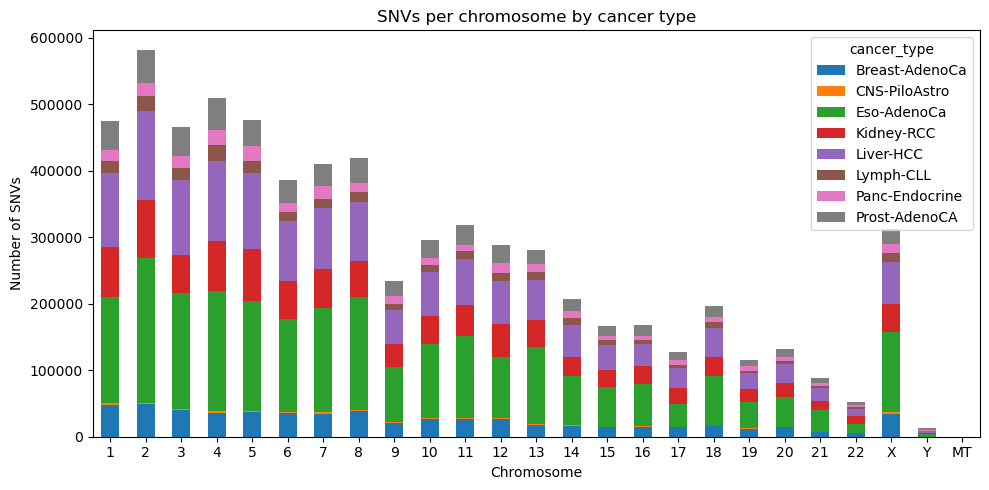

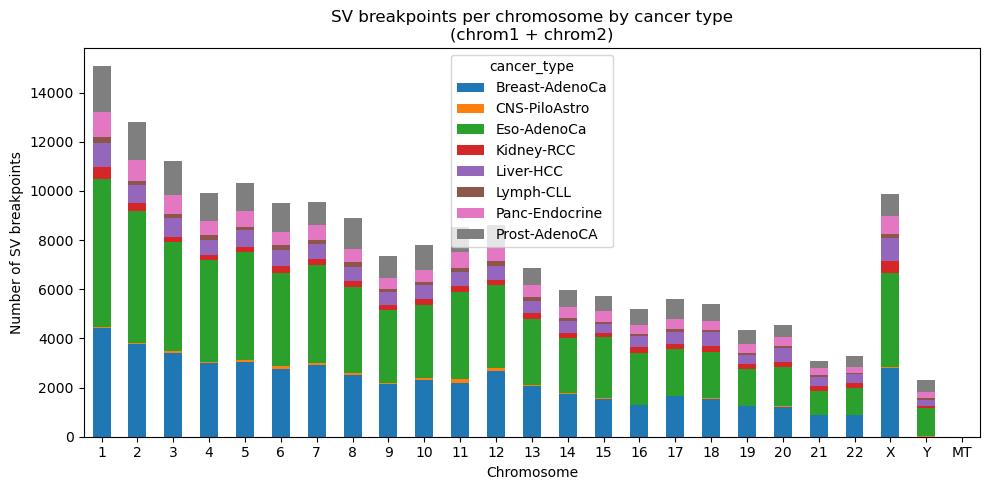

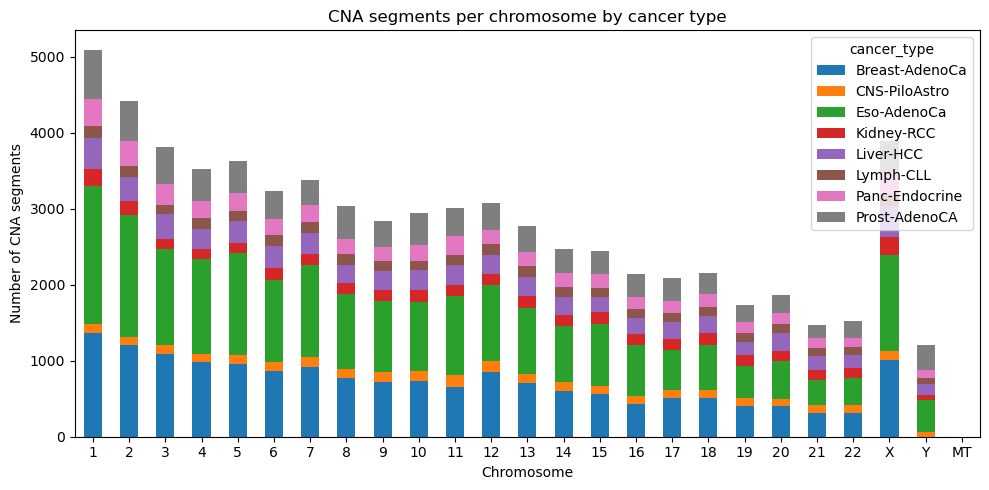

In [27]:
import matplotlib.pyplot as plt

# Optional: define a nice chromosome order
chrom_order = [str(i) for i in range(1, 23)] + ['X', 'Y', 'MT']

# -----------------------------
# 1) VCF: SNVs per chromosome per cancer type
# -----------------------------
vcf_counts = (
    vcf_df
    .groupby(['CHROM', 'cancer_type'])
    .size()
    .reset_index(name='count')
)

vcf_pivot = (
    vcf_counts
    .pivot(index='CHROM', columns='cancer_type', values='count')
    .fillna(0)
)

# Reindex to chromosome order if it matches your naming
vcf_pivot = vcf_pivot.reindex(chrom_order, axis=0, fill_value=0)

plt.figure(figsize=(10, 5))
vcf_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('SNVs per chromosome by cancer type')
plt.xlabel('Chromosome')
plt.ylabel('Number of SNVs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# -----------------------------
# 2) TSV: SV breakpoints per chromosome per cancer type
#    (using BOTH chrom1 and chrom2)
# -----------------------------
sv_long = pd.concat([
    tsv_df[['chrom1', 'cancer_type']].rename(columns={'chrom1': 'chrom'}),
    tsv_df[['chrom2', 'cancer_type']].rename(columns={'chrom2': 'chrom'})
])

sv_counts = (
    sv_long
    .groupby(['chrom', 'cancer_type'])
    .size()
    .reset_index(name='count')
)

sv_pivot = (
    sv_counts
    .pivot(index='chrom', columns='cancer_type', values='count')
    .fillna(0)
)

sv_pivot = sv_pivot.reindex(chrom_order, axis=0, fill_value=0)

plt.figure(figsize=(10, 5))
sv_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('SV breakpoints per chromosome by cancer type\n(chrom1 + chrom2)')
plt.xlabel('Chromosome')
plt.ylabel('Number of SV breakpoints')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# -----------------------------
# 3) CNA: CNA segments per chromosome per cancer type
# -----------------------------
cna_counts = (
    cna_df
    .groupby(['chrom', 'cancer_type'])
    .size()
    .reset_index(name='count')
)

cna_pivot = (
    cna_counts
    .pivot(index='chrom', columns='cancer_type', values='count')
    .fillna(0)
)

cna_pivot = cna_pivot.reindex(chrom_order, axis=0, fill_value=0)

plt.figure(figsize=(10, 5))
cna_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('CNA segments per chromosome by cancer type')
plt.xlabel('Chromosome')
plt.ylabel('Number of CNA segments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## CNA: EDA- What can we understand?

In [42]:
cna_df['seg_len'] = cna_df['end'] - cna_df['start'] + 1

seg_summary = (
    cna_df
    .groupby('cancer_type')['seg_len']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('median', ascending=False)
)

per_sample = (
    cna_df
    .groupby(['cancer_type', 'donor_id'])['seg_len']
    .median()
    .reset_index(name='median_seg_len')
)

per_sample_summary = (
    per_sample
    .groupby('cancer_type')['median_seg_len']
    .agg(['mean', 'median', 'min', 'max'])
)

print(seg_summary)
print(per_sample_summary)

# Do some cancer types tend to have longer CNA segments per sample than others?
#A: Yes. Tumors like CNS-PiloAstro, Lymph-CLL, Kidney-RCC, and Panc-Endocrine
# tend to have much longer CNA segments per sample (tens to >100 Mb, often whole-chromosome-scale),
# while Breast-AdenoCa, Eso-AdenoCa, and Prost-AdenoCA show much shorter median segment lengths,
# consistent with more focal, fragmented CNAs.

                count          mean       median   min        max
cancer_type                                                      
CNS-PiloAstro    2739  1.119817e+08  107349540.0   128  249250621
Lymph-CLL        3128  9.809353e+07   90354753.0   334  249250621
Kidney-RCC       3602  8.516857e+07   78077248.0   941  249250621
Panc-Endocrine   4871  6.299252e+07   49899967.0   321  249250621
Liver-HCC        6055  5.070432e+07   27445653.0  3370  249250621
Prost-AdenoCA    8536  3.626614e+07    6656250.5  8137  249250621
Breast-AdenoCa  16889  1.797800e+07    2446158.0  3840  249250621
Eso-AdenoCa     21899  1.400873e+07    1886865.0  1357  249250621
                        mean       median         min          max
cancer_type                                                       
Breast-AdenoCa  1.182385e+07    3404069.5    738442.5   90354753.0
CNS-PiloAstro   1.115368e+08  107349540.0  69558481.0  135006516.0
Eso-AdenoCa     3.419729e+06    2399257.5    534512.0   23918428.5
Kidne

## TSV: EDA- What can we understand?

In [48]:
# are the windows big?
# A: yes: the breakpoint windows themselves are tiny
# (basically point breakpoints), and are very different from the giant CNA segments

tsv_df['len1'] = tsv_df['end1'] - tsv_df['start1'] + 1
tsv_df['len2'] = tsv_df['end2'] - tsv_df['start2'] + 1

# Span between breakpoints for same-chromosome events
same_chr = tsv_df['chrom1'] == tsv_df['chrom2']
tsv_df['span_bp'] = np.where(
    same_chr,
    (tsv_df['start2'] - tsv_df['start1']).abs(),
    np.nan
)

print(tsv_df[['len1', 'len2']].describe())
print(tsv_df['span_bp'].describe()) # seems to be highly variable

               len1          len2
count  9.089100e+04  9.089100e+04
mean   3.672915e+06  2.809884e+06
std    1.819748e+07  1.347453e+07
min    2.000000e+00  2.000000e+00
25%    2.000000e+00  2.000000e+00
50%    2.000000e+00  2.000000e+00
75%    2.000000e+00  2.000000e+00
max    2.469267e+08  2.225982e+08
count    8.337400e+04
mean     1.507169e+07
std      3.074012e+07
min      1.270000e+02
25%      1.879340e+05
50%      1.800163e+06
75%      1.320648e+07
max      2.492506e+08
Name: span_bp, dtype: float64


In [49]:
span_summary = (
    tsv_df
    .dropna(subset=['span_bp'])
    .groupby(['cancer_type', 'svclass'])['span_bp']
    .describe()   # count, mean, std, min, 25%, 50%, 75%, max
    .reset_index()
    .sort_values(['cancer_type', 'svclass'])
)

print(span_summary.head(30))
#Across cancers, adenocarcinomas (breast, esophageal, prostate) 
# show many but mostly focal SVs (median spans ~1–2 Mb), whereas CNS-PiloAstro, 
# Lymph-CLL, Kidney-RCC, Liver-HCC, and Panc-Endocrine tumors have fewer but much broader SVs, 
# with typical spans of several to tens of megabases, often approaching chromosome-arm scale.

       cancer_type svclass    count          mean           std      min  \
0   Breast-AdenoCa     DEL   5505.0  1.240071e+07  2.607972e+07   3970.0   
1   Breast-AdenoCa     DUP  15337.0  1.194391e+07  2.535753e+07   3839.0   
2   Breast-AdenoCa  h2hINV   1410.0  7.952334e+06  1.420144e+07  10000.0   
3   Breast-AdenoCa  t2tINV   1647.0  6.443211e+06  1.318948e+07  10000.0   
4    CNS-PiloAstro     DEL    177.0  4.876589e+07  6.137132e+07    127.0   
5    CNS-PiloAstro     DUP    318.0  4.217048e+07  5.724569e+07   1460.0   
6    CNS-PiloAstro  h2hINV     34.0  9.805213e+06  2.108634e+07  10001.0   
7    CNS-PiloAstro  t2tINV     38.0  6.932077e+06  1.324764e+07  10003.0   
8      Eso-AdenoCa     DEL   8790.0  1.137841e+07  2.371236e+07   1590.0   
9      Eso-AdenoCa     DUP  19925.0  1.183529e+07  2.378053e+07   1356.0   
10     Eso-AdenoCa  h2hINV   2478.0  7.294264e+06  1.287597e+07  10000.0   
11     Eso-AdenoCa  t2tINV   2553.0  6.220206e+06  1.303231e+07  10000.0   
12      Kidn

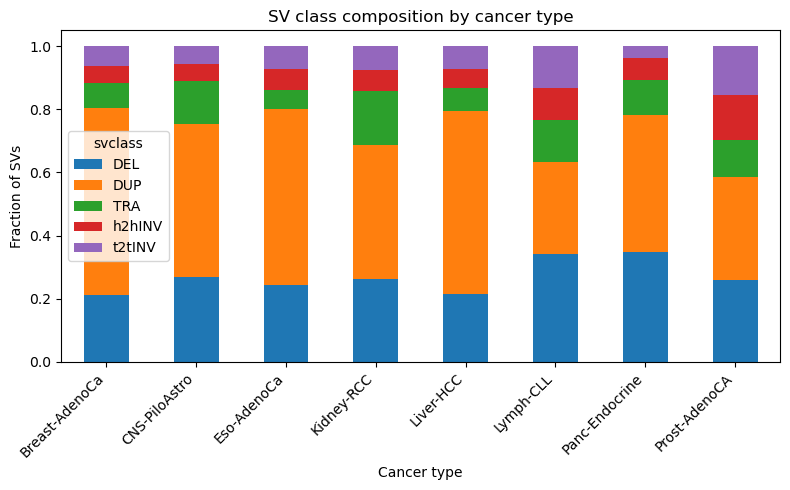

In [50]:
tsv_df['log10_span'] = np.log10(tsv_df['span_bp'])

sv_mix = (
    tsv_df
    .groupby(['cancer_type', 'svclass'])
    .size()
    .reset_index(name='count')
)

# Convert to fractions within each cancer_type
sv_mix['prop'] = (
    sv_mix['count'] /
    sv_mix.groupby('cancer_type')['count'].transform('sum')
)

sv_pivot = sv_mix.pivot(index='cancer_type', columns='svclass', values='prop').fillna(0)

plt.figure(figsize=(8, 5))
sv_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.ylabel('Fraction of SVs')
plt.xlabel('Cancer type')
plt.title('SV class composition by cancer type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 800x400 with 0 Axes>

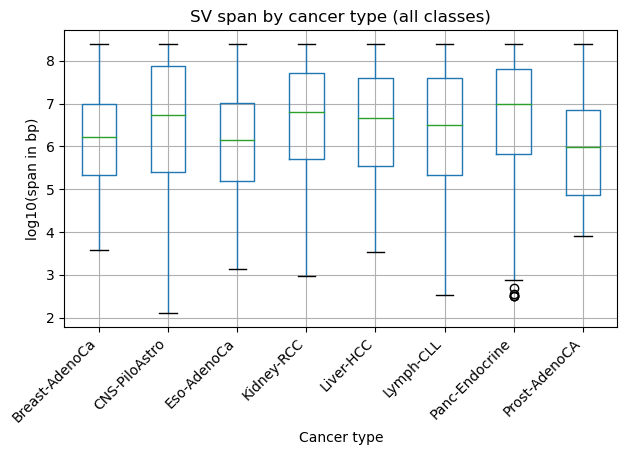

In [51]:
span_df = tsv_df.dropna(subset=['log10_span'])

plt.figure(figsize=(8, 4))
span_df.boxplot(column='log10_span', by='cancer_type')
plt.title('SV span by cancer type (all classes)')
plt.suptitle('')
plt.ylabel('log10(span in bp)')
plt.xlabel('Cancer type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


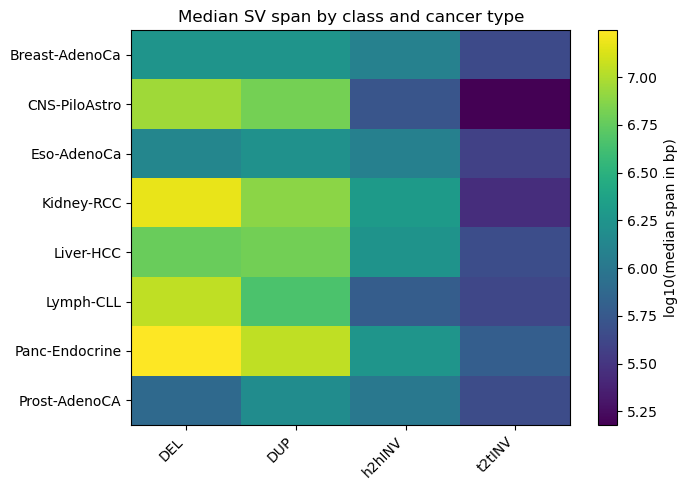

In [53]:
span_summary = (
    span_df
    .groupby(['cancer_type', 'svclass'])['span_bp']
    .median()
    .reset_index()
)

# log10 for nicer scale
span_summary['log10_median_span'] = np.log10(span_summary['span_bp'])

heat = span_summary.pivot(index='cancer_type',
                          columns='svclass',
                          values='log10_median_span')

plt.figure(figsize=(7, 5))
im = plt.imshow(heat, aspect='auto')
plt.colorbar(im, label='log10(median span in bp)')
plt.xticks(range(heat.shape[1]), heat.columns, rotation=45, ha='right')
plt.yticks(range(heat.shape[0]), heat.index)
plt.title('Median SV span by class and cancer type')
plt.tight_layout()
plt.show()

#Adenocarcinomas tend to have focal SVs, whereas CNS, hematologic, kidney, and pancreatic
# endocrine tumors show much broader deletions/duplications, often spanning tens of megabases.


<Figure size 800x400 with 0 Axes>

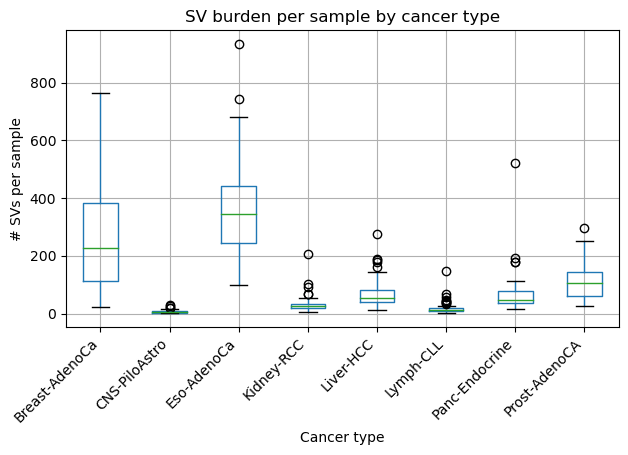

In [54]:
per_sample_sv = (
    tsv_df
    .groupby(['cancer_type', 'donor_id'])
    .size()
    .reset_index(name='n_svs')
)

plt.figure(figsize=(8, 4))
per_sample_sv.boxplot(column='n_svs', by='cancer_type')
plt.title('SV burden per sample by cancer type')
plt.suptitle('')
plt.ylabel('# SVs per sample')
plt.xlabel('Cancer type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Esophageal and breast adenocarcinomas have the highest SV burdens per sample, 
#while CNS, lymphoid, kidney, liver and pancreatic endocrine tumors carry 
#fewer but often larger SVs.


## VCF: EDA- What can we understand?

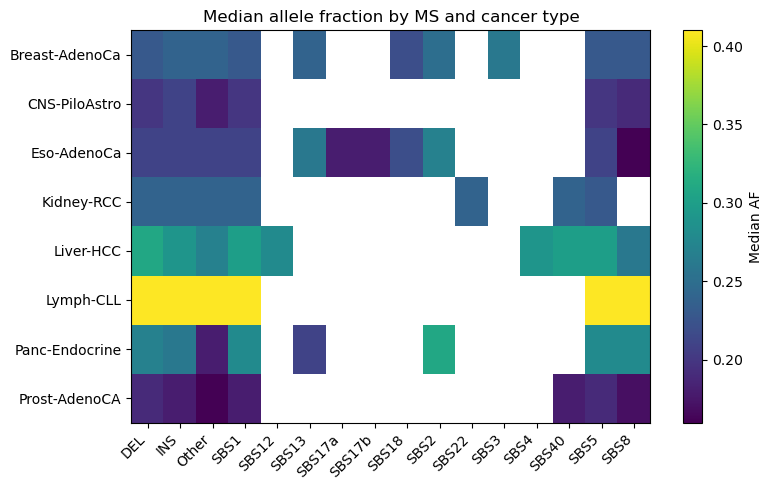

In [62]:
top_ms = vcf_df['MS_val'].value_counts().head(15).index  # top 15 MS labels
vcf_df['MS_group'] = np.where(vcf_df['MS_val'].isin(top_ms),
                              vcf_df['MS_val'],
                              'Other')
af_pivot = (
    vcf_df
    .groupby(['cancer_type', 'MS_group'])['AF_val']
    .median()
    .reset_index()
    .pivot(index='cancer_type', columns='MS_group', values='AF_val')
)

plt.figure(figsize=(8, 5))
im = plt.imshow(af_pivot, aspect='auto')
plt.colorbar(im, label='Median AF')
plt.xticks(range(af_pivot.shape[1]), af_pivot.columns, rotation=45, ha='right')
plt.yticks(range(af_pivot.shape[0]), af_pivot.index)
plt.title('Median allele fraction by MS and cancer type')
plt.tight_layout()
plt.show()

#AF is high (bright yellow) almost across all MS categories 
# meaning mutations are often high-fraction / clonal in these synthetic CLL samples.


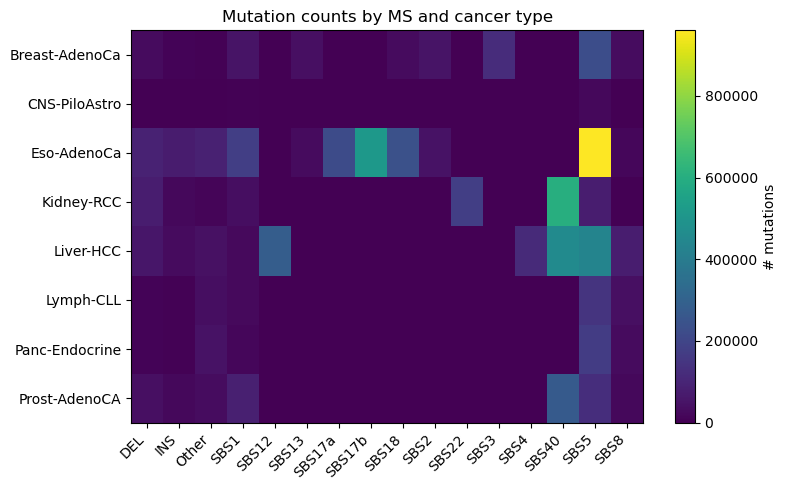

In [63]:
count_pivot = (
    vcf_df
    .groupby(['cancer_type', 'MS_group'])
    .size()
    .reset_index(name='count')
    .pivot(index='cancer_type', columns='MS_group', values='count')
    .fillna(0)
)

plt.figure(figsize=(8, 5))
im = plt.imshow(count_pivot, aspect='auto')
plt.colorbar(im, label='# mutations')
plt.xticks(range(count_pivot.shape[1]), count_pivot.columns, rotation=45, ha='right')
plt.yticks(range(count_pivot.shape[0]), count_pivot.index)
plt.title('Mutation counts by MS and cancer type')
plt.tight_layout()
plt.show()

#Different cancers have very distinct mutational signature profiles,
# and some are almost monopolized by a single signature. (Eso and S8S5)

In [64]:
# how many distinct samples (ID) mutate each position within each cancer type
recurrent = (
    vcf_df
    .groupby(['cancer_type', 'CHROM', 'POS'])['ID']
    .nunique()
    .reset_index(name='n_samples')
)

# positions hit in >1 sample of the same cancer
recurrent_hits = recurrent[recurrent['n_samples'] > 1]

# quick summary: how many recurrent sites per cancer
print(
    recurrent_hits
    .groupby('cancer_type')['n_samples']
    .agg(['count', 'max'])
    .sort_values('count', ascending=False)
)


                count  max
cancer_type               
Eso-AdenoCa      9786   28
Liver-HCC        2626    8
Kidney-RCC       1926    8
Breast-AdenoCa   1279   16
Prost-AdenoCA     659   16
Lymph-CLL         459    9
Panc-Endocrine    452    6
CNS-PiloAstro      75   10


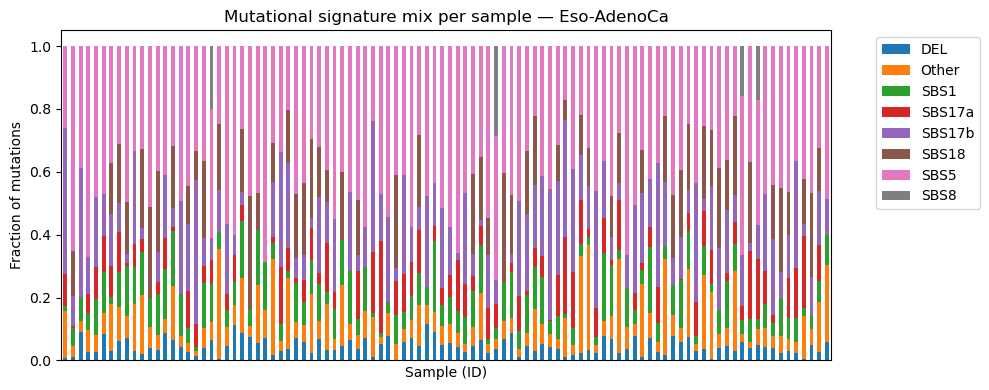

In [65]:
# 0) Clean AF/MS if not already done

# Focus on most common MS labels
top_ms = vcf_df['MS_val'].value_counts().head(10).index
vcf_df['MS_group'] = np.where(vcf_df['MS_val'].isin(top_ms),
                              vcf_df['MS_val'],
                              'Other')

# 1) Per-sample signature counts
per_sample_ms = (
    vcf_df
    .groupby(['cancer_type', 'ID', 'MS_group'])
    .size()
    .reset_index(name='count')
)

# Convert to fractions within each sample
per_sample_ms['prop'] = (
    per_sample_ms['count'] /
    per_sample_ms.groupby(['cancer_type', 'ID'])['count'].transform('sum')
)

# 2) Plot for one cancer type at a time (example: Eso-AdenoCa)
ct = 'Eso-AdenoCa'
sub = per_sample_ms[per_sample_ms['cancer_type'] == ct]

# pivot: samples on x, MS_group as stacked bars
pivot = sub.pivot(index='ID', columns='MS_group', values='prop').fillna(0)

plt.figure(figsize=(10, 4))
pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title(f'Mutational signature mix per sample — {ct}')
plt.ylabel('Fraction of mutations')
plt.xlabel('Sample (ID)')
plt.xticks([], [])   # samples often many; hide x labels if crowded
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


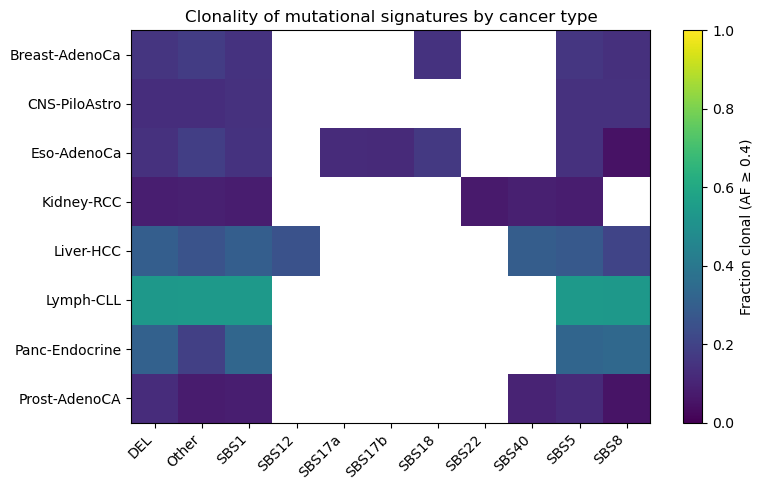

In [66]:
# 0) define clonal vs subclonal (threshold is somewhat arbitrary; tweak if you like)
threshold = 0.4
vcf_df['clonal'] = vcf_df['AF_val'] >= threshold

# 1) fraction clonal per cancer_type × MS_group
clonal_frac = (
    vcf_df
    .groupby(['cancer_type', 'MS_group'])['clonal']
    .mean()
    .reset_index(name='frac_clonal')
)

# keep only MS groups that appear reasonably often
ms_order = (
    vcf_df['MS_group']
    .value_counts()
    .loc[lambda s: s > 1000]        # require at least 1000 mutations globally
    .index
)
clonal_frac = clonal_frac[clonal_frac['MS_group'].isin(ms_order)]

heat = clonal_frac.pivot(index='cancer_type',
                         columns='MS_group',
                         values='frac_clonal')

plt.figure(figsize=(8, 5))
im = plt.imshow(heat, aspect='auto', vmin=0, vmax=1)
plt.colorbar(im, label='Fraction clonal (AF ≥ 0.4)')
plt.xticks(range(heat.shape[1]), heat.columns, rotation=45, ha='right')
plt.yticks(range(heat.shape[0]), heat.index)
plt.title('Clonality of mutational signatures by cancer type')
plt.tight_layout()
plt.show()


In [67]:
recurrent = (
    vcf_df
    .groupby(['cancer_type', 'CHROM', 'POS'])['ID']
    .nunique()
    .reset_index(name='n_samples')
)

recurrent_hits = recurrent[recurrent['n_samples'] > 1]

# Top recurrent sites per cancer
top_rec = (
    recurrent_hits
    .sort_values(['cancer_type', 'n_samples'], ascending=[True, False])
    .groupby('cancer_type')
    .head(5)
)

print(top_rec)


            cancer_type CHROM        POS  n_samples
344978   Breast-AdenoCa     3  178952085         16
344972   Breast-AdenoCa     3  178936091         11
453083   Breast-AdenoCa     6  157265320          9
50140    Breast-AdenoCa    10    8106058          8
50144    Breast-AdenoCa    10    8111433          8
610581    CNS-PiloAstro     8   38274849         10
609799    CNS-PiloAstro     7  140453136          5
610578    CNS-PiloAstro     8   38272308          5
594193    CNS-PiloAstro    17   29560044          4
609797    CNS-PiloAstro     7  140450920          4
2062732     Eso-AdenoCa     4   29527284         28
1690423     Eso-AdenoCa     2  140749711         18
1208597     Eso-AdenoCa    13  105232959         17
1603482     Eso-AdenoCa     2   50749710         17
2759188     Eso-AdenoCa     8   77204904         17
3156266      Kidney-RCC    10   89724539          8
3594314      Kidney-RCC     3   10183846          7
3102112      Kidney-RCC     1  179990329          6
3124321     